# Imports

In [3]:
import pandas as pd
import random
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

# Task 3 - Classification by fine-tuning BERT

## Build Model

In [2]:
!pip install simpletransformers

     |████████████████████████████████| 249 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 4.0 MB 44.9 MB/s 
     |████████████████████████████████| 1.2 MB 40.3 MB/s 
     |████████████████████████████████| 10.1 MB 29.3 MB/s 
     |████████████████████████████████| 325 kB 48.0 MB/s 
     |████████████████████████████████| 6.6 MB 39.1 MB/s 
     |████████████████████████████████| 1.8 MB 40.1 MB/s 
     |████████████████████████████████| 77 kB 6.9 MB/s 
     |████████████████████████████████| 880 kB 49.6 MB/s 
     |████████████████████████████████| 596 kB 41.5 MB/s 
     |████████████████████████████████| 144 kB 51.8 MB/s 
     |████████████████████████████████| 181 kB 49.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 44.7 MB/s 
     |████████████████████████████████| 136 kB 47.0 MB/s 
     |████████████████████████████████| 212 kB 47.5 MB/s 
     |██████████████

In [1]:
from simpletransformers.classification import ClassificationModel

BERT = ClassificationModel("bert", "bert-base-cased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

## Train Model

In [4]:
train_path = "olid-train.csv"
train_file = pd.read_csv(train_path)
train_file = train_file.drop("id", axis=1)
#print(train_file)



In [5]:
BERT.train_model(train_df=train_file)

  0%|          | 0/13240 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/1655 [00:00<?, ?it/s]

(1655, 0.4959592888362458)

## Test Model

In [6]:
test_path = "olid-test.csv"
test_file = pd.read_csv(test_path)
test_file = test_file.drop(["id", "labels"], axis=1)
test_file = test_file["text"].tolist()
#print(test_file)



In [7]:
predictions, raw_outputs = BERT.predict(to_predict=test_file)

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

## Evaluate Model

### Metrics

In [8]:
test = pd.read_csv(test_path)
gold = test["labels"].tolist()

from sklearn.metrics import precision_recall_fscore_support

zero_positive = precision_recall_fscore_support(gold, predictions, average='binary', pos_label=0)
one_positive = precision_recall_fscore_support(gold, predictions, average='binary', pos_label=1)
macro = precision_recall_fscore_support(gold, predictions, average="macro")
weighted = precision_recall_fscore_support(gold, predictions, average="weighted")

print("\033[1mTASK 3A - FINE TUNING BERT (2.5 points):\n---------------------------------------\033[0m\n")
print("\033[1mResults for 0 as positive class:\n--------------------------------\033[0m")
print("Precision:", zero_positive[0], "\nRecall:", zero_positive[1], "\nF1:", zero_positive[2])

print("\n\033[1mResults for 1 as positive class:\n--------------------------------\033[0m")
print("Precision:", one_positive[0], "\nRecall:", one_positive[1], "\nF1:", one_positive[2])

print("\n\033[1mResults for macro-average:\n--------------------------------\033[0m")
print("Precision:", macro[0], "\nRecall:", macro[1], "\nF1:", macro[2])

print("\n\033[1mResults for weighted-average:\n--------------------------------\033[0m")
print("Precision:", weighted[0], "\nRecall:", weighted[1], "\nF1:", weighted[2])

TASK 3A - FINE TUNING BERT (2.5 points):
---------------------------------------

Results for 0 as positive class:
--------------------------------
Precision: 0.8689759036144579 
Recall: 0.9306451612903226 
F1: 0.8987538940809969

Results for 1 as positive class:
--------------------------------
Precision: 0.7806122448979592 
Recall: 0.6375 
F1: 0.7018348623853211

Results for macro-average:
--------------------------------
Precision: 0.8247940742562085 
Recall: 0.7840725806451613 
F1: 0.8002943782331591

Results for weighted-average:
--------------------------------
Precision: 0.8443162779261327 
Recall: 0.8488372093023255 
F1: 0.8437997457008083


### Confusion Matrix

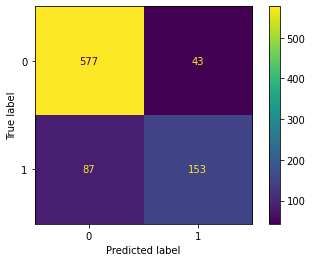

In [9]:
BERTRIX = confusion_matrix(gold, predictions)
BERTPLOT = ConfusionMatrixDisplay(confusion_matrix=BERTRIX)
BERTPLOT.plot()

# Tokenization Analysis

## Task 4A

In [10]:
def subword_analysis(df):
  '''This function takes a dataframe which must include a "BERTokens" column and returns the number of tokens,
  the number of tokens split into subwords, and the total number of subwords for one cell in this column'''

  tlist = df["BERTokens"]
  tokens = len(tlist) #number of tokens
  splitted = 0 #number of split tokens
  n_sub = 0 #total subwords

  for count, token in enumerate(tlist):
    if token[0:2] =="##":
      n_sub += 1
      if str(tlist[count-1][0:2]) !="##": #New split token reached
        splitted += 1
        n_sub += 1 #count first subword as well
      
  return tokens, splitted, n_sub

In [11]:
data = train_file.copy()
data["BERTokens"] = train_file["text"].apply(BERT.tokenizer.tokenize)
data[["N_Tokens", "N_Splitted", "N_Subwords"]] = data.apply(func=subword_analysis, result_type='expand', axis=1)

print("\033[1mTASK 4A - INSPECT THE TOKENIZATION USING THE BERT TOKENIZER (2.5 points):\n-------------------------------------------------------------------------\033[0m")
print("Number of tokens:", data["N_Tokens"].sum())
print("Number of tokens that have been split into subwords:", data["N_Splitted"].sum())
print("Average number of subwords per token:", data["N_Subwords"].sum()/data["N_Tokens"].sum())

TASK 4A - INSPECT THE TOKENIZATION USING THE BERT TOKENIZER (2.5 points):
-------------------------------------------------------------------------
Number of tokens: 478955
Number of tokens that have been split into subwords: 67045
Average number of subwords per token: 0.3300289171216503


## Task 4D

In [15]:
vocab = BERT.tokenizer.vocab

print("Length of the longest subword:", max(map(len, vocab)))
print("Examples of a subwords with max. length:", [key for key in vocab if len(key) == 18])


Length of the longest subword: 18
Examples of a subword with max. length: ['telecommunications', 'Telecommunications']
